In [1]:
# Get Kagome Real Space Structure from Python Code
using PyCall

In [2]:
py"""

import matplotlib.pyplot as plt
import numpy as np

sqrt = np.sqrt

#Bravais vectors
a1_vec = np.array([2,0])
a2_vec = np.array([1,sqrt(3)])

# number of unit-cell in each axes
l1 = 2
l2 = 2 
L = l1*l2 # number of unit-cells
N = 3*L # number of sites

#Basis vectors
b1=np.array([0,0]) #A atoms
b2=a1_vec/2 #B atoms
b3=a2_vec/2 #C atoms
Basis = [b1,b2,b3]
basis_colors=['red','blue','green']

coordinates = []
sites = []
atom_dict={}
for i1 in range(l1):
    for i2 in range(l2):
        Lp = a1_vec * i1 + a2_vec * i2
        center = a1_vec * i1 + a2_vec * i2 + b1
        shift = (-b2-b3)/sqrt(3)/2
        P1=np.array([center+shift,center+a1_vec+shift,center+a2_vec+shift])
        for ib, b in enumerate(Basis):
            atom_vec = Lp + b
            atom_no = 3 * i1 * l2 + 3 * i2 + ib
            site = [i1,i2,ib]
            sites.append(site)
            coordinates.append(atom_vec)
            atom_dict[tuple(site)]=atom_vec

NN = [[(0,0,1),(0,0,2),(-1,0,1),(0,-1,2)],
      [(0,0,-1),(0,0,1),(1,0,-1),(1,-1,1)],
      [(0,0,-1),(0,0,-2),(0,1,-2),(-1,1,-1)]]

NNN = [[(-1,0,2),(-1,1,1),(0,-1,1),(1,-1,2)],
      [(0,-1,1),(1,-1,-1),(0,1,-1),(1,0,1)],
      [(-1,1,-2),(-1,0,-1),(0,1,-1),(1,0,-2)]]

# t1 = -1;L1 = t2 = L2 = 0
# t1 = -1;L1 = 0.28;t2 = -0.3;L2 = 0.2
t1 = t2 = -1 ; L1=L2=0
hopps_NN = [[t1+1j*L1,t1-1j*L1,t1+1j*L1,t1-1j*L1], 
         [t1-1j*L1,t1+1j*L1,t1-1j*L1,t1+1j*L1], 
         [t1-1j*L1,t1+1j*L1,t1+1j*L1,t1-1j*L1]] 

hopps_NNN = [[t2+1j*L2,t2-1j*L2,t2-1j*L2,t2+1j*L2],
         [t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2],
         [t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2]]

H_NN = np.zeros([N,N],dtype=complex)
H_NNN = np.zeros([N,N],dtype=complex)

for atom_no in range(N):
    atom_site=sites[atom_no]
    for i_delta, delta in enumerate(NN[atom_site[2]]):
        neighbor_site = np.array(atom_site)+np.array(delta)
        neighbor_site[0] = neighbor_site[0]%l1
        neighbor_site[1] = neighbor_site[1]%l2    
        neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
        H_NN[neighbor_no,atom_no]=hopps_NN[atom_site[2]][i_delta]

for atom_no in range(N):
    atom_site=sites[atom_no]
    for i_delta, delta in enumerate(NNN[atom_site[2]]):
        neighbor_site = np.array(atom_site)+np.array(delta)
        neighbor_site[0] = neighbor_site[0]%l1
        neighbor_site[1] = neighbor_site[1]%l2    
        neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
        H_NNN[neighbor_no,atom_no]=hopps_NNN[atom_site[2]][i_delta]
"""

In [3]:
#Real Space Hamiltonian Matrix Getting by Python Code
H_NN = PyArray(py"H_NN"o)
H_NNN = PyArray(py"H_NNN"o)

12×12 PyArray{ComplexF64, 2}:
  0.0+0.0im   0.0+0.0im   0.0+0.0im  …   0.0+0.0im  -1.0+0.0im  -1.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im     -1.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im   0.0+0.0im     -1.0+0.0im   0.0+0.0im   0.0+0.0im
  0.0+0.0im  -1.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im  -1.0+0.0im
 -1.0+0.0im   0.0+0.0im  -1.0+0.0im      0.0+0.0im   0.0+0.0im  -1.0+0.0im
  0.0+0.0im  -1.0+0.0im   0.0+0.0im  …  -1.0+0.0im  -1.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im  -1.0+0.0im      0.0+0.0im  -1.0+0.0im   0.0+0.0im
  0.0+0.0im   0.0+0.0im  -1.0+0.0im     -1.0+0.0im   0.0+0.0im  -1.0+0.0im
 -1.0+0.0im  -1.0+0.0im   0.0+0.0im      0.0+0.0im  -1.0+0.0im   0.0+0.0im
  0.0+0.0im  -1.0+0.0im  -1.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im
 -1.0+0.0im   0.0+0.0im   0.0+0.0im  …   0.0+0.0im   0.0+0.0im   0.0+0.0im
 -1.0+0.0im   0.0+0.0im   0.0+0.0im      0.0+0.0im   0.0+0.0im   0.0+0.0im

# Many-Body

In [4]:
using QuantumOptics
using LinearAlgebra
using SparseArrays

In [5]:
#Number of Unit-cells Each Directions
Nx = Ny = py"l1"
#Total Number of Sites
N = 3*py"L"
println("The Number of Sites=",N)

The Number of Sites=12


In [6]:
#Create N Level Basis for Many-Body States
NBasis = NLevelBasis(N)

NLevel(N=12)

# Hard-Core Interaction

In [7]:
#Total Particle Number in Lattice
PN=2
#All of states in N Fock Space for Hard-Core Interaction
HC_NStates = bosonstates(NBasis, [PN]) 
# Max. Occupation number is equal to 1 (Hard-Core Interaction or Many-Body for Fermionic States)

78-element Vector{Vector{Int64}}:
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]

In [8]:
A = bosonstates(NBasis, [PN]) 
B = fermionstates(NBasis, [PN])
# Fermion durumlarında -1 çarpanı geliyor, bunun için Hard-Core etkileşimini boson durumlarda 2 satırlarını çıkartarak yaptım
C = setdiff(A,B)
HC_NStates = setdiff(A,C)

66-element Vector{Vector{Int64}}:
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [9]:
#Create Hard-Core Many-Body Basis in Fock Space
HC_NBasis_MB = ManyBodyBasis(NBasis, HC_NStates)

ManyBody(onebodybasis=NLevel(N=12), states:66)

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
Generalized Fermionic Fock States:
\begin{align}
c_\alpha^{\dagger}\ket{...,n_\beta,n_\alpha,n_\gamma,...} =(-1)^{\sum_{\beta<\alpha}n_{\beta}}\left(\sqrt{n_\alpha+1} \right) \ket{...,n_\beta,n_\alpha+1,n_\gamma,...} 
\\
c_\alpha\ket{...,n_\beta,n_\alpha,n_\gamma,...} =(-1)^{\sum_{\beta<\alpha}n_{\beta}}\sqrt{n_\alpha} \ket{...,n_\beta,n_\alpha-1,n_\gamma,...} 
\end{align}

In [10]:
HC_Hamiltonian_MB = SparseOperator(HC_NBasis_MB)
for m in 1:N
    for n in 1:N
        # Phase Factors= H_NN[m,n] and H_NNN[m,n]
        # Hopping Terms= transition(HC_NBasis_MB, m, n)
        HC_Hamiltonian_MB = HC_Hamiltonian_MB + H_NN[m,n] * transition(HC_NBasis_MB, m, n) + H_NNN[m,n] * transition(HC_NBasis_MB, m, n)
    end
end
#Energies of Hard-Core Interaction
eigenenergies(dense(HC_Hamiltonian_MB))    
#Note That: Single Particle (PN=1) Eigenvalues of Julia Code is the same in Momentum Space for All Hopping Parameter.

66-element Vector{Float64}:
 -14.58300524425836
  -6.472135954999586
  -6.472135954999584
  -6.472135954999581
  -6.4721359549995805
  -6.4721359549995805
  -6.4721359549995805
  -6.472135954999578
  -6.472135954999578
  -6.472135954999574
  -3.2915026221291823
  -3.2915026221291805
  -5.19778728403013e-15
   ⋮
   3.999999999999993
   3.9999999999999942
   3.9999999999999987
   3.9999999999999987
   3.9999999999999987
   4.0
   4.000000000000001
   4.000000000000002
   4.000000000000002
   6.58300524425836
   7.291502622129175
   7.291502622129185

In [11]:
println("Total Number of Particle=",PN," ,Total Number of Unit-Cell=",Nx*Ny," =>","Filling Fraction=",PN/(Nx*Ny))

Total Number of Particle=2 ,Total Number of Unit-Cell=4 =>Filling Fraction=0.5


Filling Fraction on Kagome Model for Topological Dejeneracy:
\begin{align}
\frac{1}{2} = \frac{N}{N_{cell}} = \frac{N}{N1N2} = \frac{4}{2*2}
\end{align}

In [12]:
using Plots

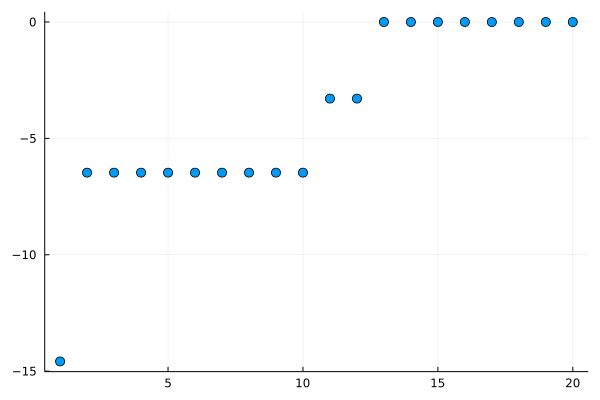

In [13]:
y = eigenenergies(dense(HC_Hamiltonian_MB))[1:20]
x=1:length(y)
gr()
plot(x, y, seriestype = :scatter, markersize = 5, legend=false)

# Bose-Hubbard Model

\begin{equation}
H = -t \sum_{<ij>} \left( b_i^\dagger b_j + h.c. \right) + U/2 \sum_i n_i \left( n_i -1\right)
\end{equation}

In [14]:
NBasis

NLevel(N=12)

In [15]:
#All of states in N Fock Space
PN=2
NStates = bosonstates(NBasis, [PN]) 
#Define Maximum Occupation Number (Total Particle Number) for Many-Body Basis

78-element Vector{Vector{Int64}}:
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]

In [16]:
println("The Number of Sites=",N,", The Number of Particles=", PN)

The Number of Sites=12, The Number of Particles=2


In [17]:
#Create Many-Body Basis in Fock Space
NBasis_MB = ManyBodyBasis(NBasis, NStates)

ManyBody(onebodybasis=NLevel(N=12), states:78)

In [18]:
#Bose-Hubbard Model for Kagome
#On-Site Potantiel Term
U=2
#Kinetic term
KT = SparseOperator(NBasis_MB)
#Interaction term
IT = SparseOperator(NBasis_MB)
for m in 1:N
    # Occupation (total particle) Operator: number(NBasis_MB, m)
    IT = IT + U/2 * number(NBasis_MB, m) * (number(NBasis_MB, m) - identityoperator(NBasis_MB)) 
    for n in 1:N
        KT = KT - H_NN[m,n] * transition(NBasis_MB, m, n) - H_NNN[m,n] * transition(NBasis_MB, m, n)
    end
end
MB_Hamiltonian = KT + IT
#Energies of Many-Body Hamiltonian with On-Site Interaction
eigenenergies(dense(MB_Hamiltonian))

78-element Vector{Float64}:
 -7.863260039755923
 -7.863260039755909
 -7.722514260539853
 -4.000000000000003
 -4.000000000000002
 -4.000000000000002
 -4.000000000000002
 -4.000000000000001
 -4.000000000000001
 -4.0
 -3.9999999999999987
 -3.999999999999996
 -3.4931364939914444
  ⋮
  4.509640222677438
  4.509640222677443
  8.402944676438475
  8.402944676438484
  8.402944676438484
  8.402944676438484
  8.402944676438484
  8.402944676438487
  8.402944676438487
  8.402944676438489
  8.40294467643849
 16.186522232579847

In [19]:
using Plots

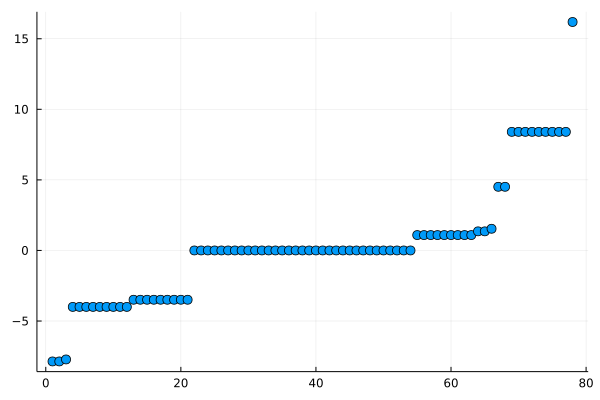

In [20]:
y = eigenenergies(dense(MB_Hamiltonian))
x=1:length(y)
gr()
plot(x, y, seriestype = :scatter, markersize = 5, legend=false)